In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

__rows = 1
__cols = 1
def sb_init( rows, cols ):
    plt.figure( figsize=[ cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    plt.subplot( rows, cols, 1 )
def sb( x, y):
    plt.subplot( __rows, __cols, x + ( y - 1 ) * __cols )

<ErrorbarContainer object of 3 artists>

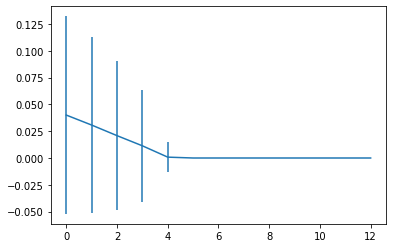

In [2]:
corr_func = np.loadtxt( "corr_func.txt" )
plt.errorbar( corr_func[:,0], corr_func[:,1], corr_func[:,2] )

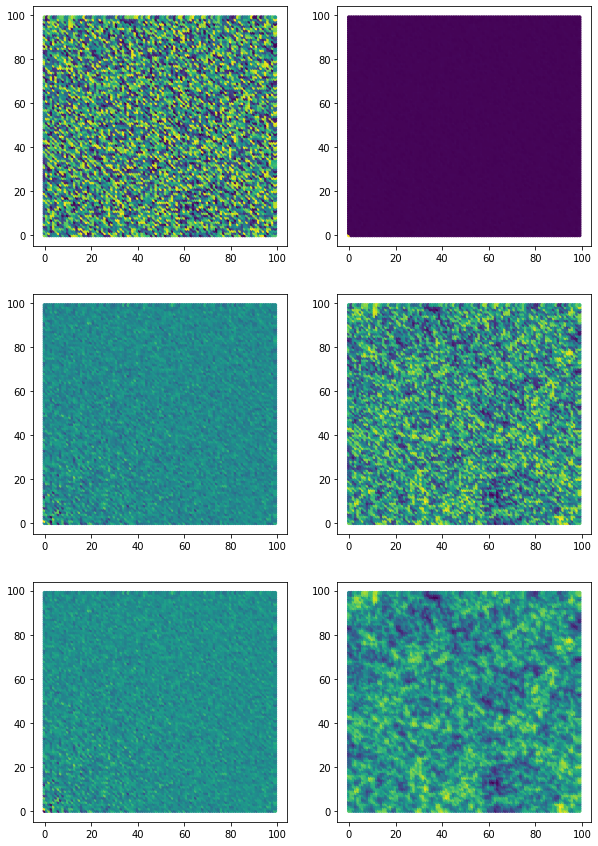

In [22]:
plt.figure(figsize=[10,15])
plt.subplot(3,2,1)
real = np.loadtxt( "real.txt" )
plt.scatter(real[:,0],real[:,1],marker='.',c=real[:,2])

plt.subplot(3,2,2)
fft = np.loadtxt( "fft.txt" )
plt.scatter(fft[:,0],fft[:,1],marker='.',c=fft[:,2])

plt.subplot(3,2,3)
fft2 = np.loadtxt( "fft2.txt" )
plt.scatter(fft2[:,0],fft2[:,1],marker='.',c=fft2[:,2])

plt.subplot(3,2,4)
real2 = np.loadtxt( "real2.txt" )
plt.scatter(real2[:,0],real2[:,1],marker='.',c=real2[:,2])

plt.subplot(3,2,5)
plt.scatter(fft2[:,0],fft2[:,1],marker='.',c=fft2[:,2] - fft[:,2])

plt.subplot(3,2,6)
plt.scatter(real2[:,0],real2[:,1],marker='.',c=real2[:,2] - real[:,2])


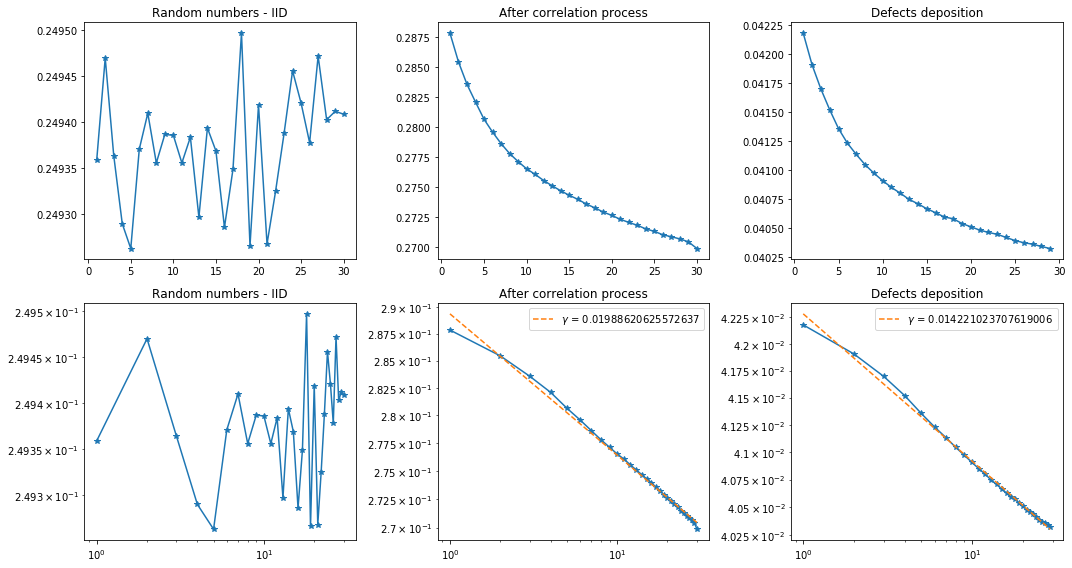

In [32]:
lims = [1, 30]
def line(x,m,q):
    return m*x+q
def exp(x,m,q):
    return np.exp( m * np.log(x) + q );

sb_init(2,3)

cf1 = np.loadtxt( "cf1.txt" )
cf1 = cf1[ np.logical_and( cf1[:,0] >= min(lims), cf1[:,0] <= max(lims) ), :]
cf1 = cf1[ cf1[:,0].argsort() ]
plt.plot( cf1[:,0], cf1[:,1], '-*')
plt.title("Random numbers - IID")

sb(1,2)
plt.loglog( cf1[:,0], cf1[:,1], '-*')
plt.title("Random numbers - IID")

sb(2,1)
cf2 = np.loadtxt( "cf2.txt" )
cf2 = cf2[ np.logical_and( cf2[:,0] >= min(lims), cf2[:,0] <= max(lims) ), :]
cf2 = cf2[ cf2[:,0].argsort() ]
plt.plot( cf2[:,0], cf2[:,1], '-*')
plt.title("After correlation process")

sb(2,2)
plt.loglog( cf2[:,0], cf2[:,1], '-*')

params, params_cv = curve_fit( line, np.log(cf2[:,0]), np.log(cf2[:,1]))
plt.loglog( cf2[:,0], exp( cf2[:,0], params[0], params[1] ), '--', label= r"$\gamma$ = " + str(-params[0]) )
plt.legend()

plt.title("After correlation process")

sb(3,1)
cfd = np.loadtxt( "cf_defects.txt" )
cfd = cfd[ np.logical_and( cfd[:,0] >= min(lims), cfd[:,0] <= max(lims) ), :]
cfd = cfd[ cfd[:,0].argsort() ]
plt.plot( cfd[:,0], cfd[:,1], '-*')
plt.title("Defects deposition")

sb(3,2)
plt.loglog( cfd[:,0], cfd[:,1], '-*')
plt.title("Defects deposition")
params, params_cv = curve_fit( line, np.log(cfd[:,0]), np.log(cfd[:,1]))
plt.loglog( cfd[:,0], exp( cfd[:,0], params[0], params[1] ), '--', label= r"$\gamma$ = " + str(-params[0]) )
plt.legend()


plt.tight_layout()

plt.savefig("CorrFunc_20211205_200x2000_0.4.pdf")

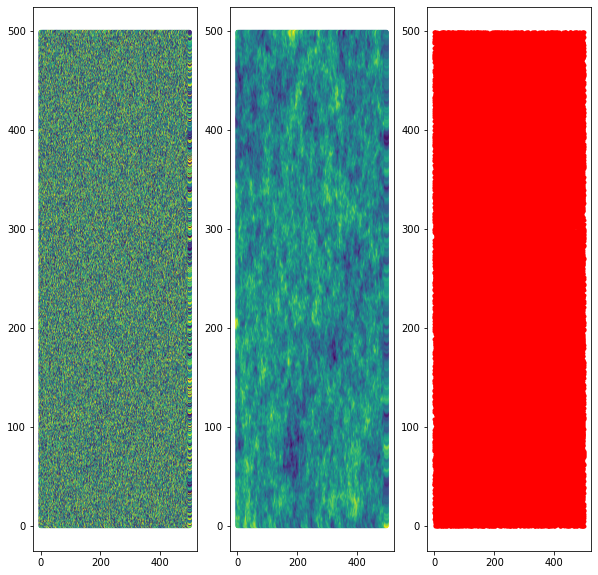

In [14]:
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
real = np.loadtxt( "real.txt" )
plt.scatter(real[:,0],real[:,1],marker='.',c=real[:,2])

plt.subplot(1,3,2)
real2 = np.loadtxt( "real2.txt" )
plt.scatter(real2[:,0],real2[:,1],marker='.',c=real2[:,2])

plt.subplot(1,3,3)
defects = np.loadtxt( "defects.txt" )
defects = defects[ defects[:,2] == 1, :]
plt.scatter(defects[:,0],defects[:,1],marker='.', c='r')


In [21]:
real2 = np.loadtxt( "real2.txt" )
np.average(real2[:,2])

0.46517969791638386